In [1]:
import pandas as pd

In [2]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [1]:
import yfinance as yf
import datetime as dt

In [2]:
start = dt.datetime(2021,9,1)
end = dt.datetime(2022,2,4)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data
#stk_data.to_csv("Tatacoffee13_21.csv")

,Open,High,Low,Close
Date,,,,
2021-09-01,214.000000,214.250000,207.899994,211.100006
2021-09-02,211.899994,213.750000,208.699997,209.500000
2021-09-03,210.000000,211.250000,206.399994,207.600006
2021-09-06,207.600006,209.500000,203.199997,204.100006
2021-09-07,211.350006,217.000000,209.600006,212.449997
...,...,...,...,...
2022-01-28,214.850006,225.699997,210.000000,212.399994
2022-01-31,215.399994,218.800003,214.199997,216.250000
2022-02-01,217.550003,218.399994,212.550003,214.899994


In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (107, 1)


In [7]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    print("------------------")

RMSE-Testset: 0.10148140921446115
maPe-Testset: 11317147832347.06
------------------
RMSE-Testset: 0.1016194820702884
maPe-Testset: 11242807193633.059
------------------
RMSE-Testset: 0.10146336253540401
maPe-Testset: 11245878263824.016
------------------
RMSE-Testset: 0.1016194820702884
maPe-Testset: 11242807193633.059
------------------


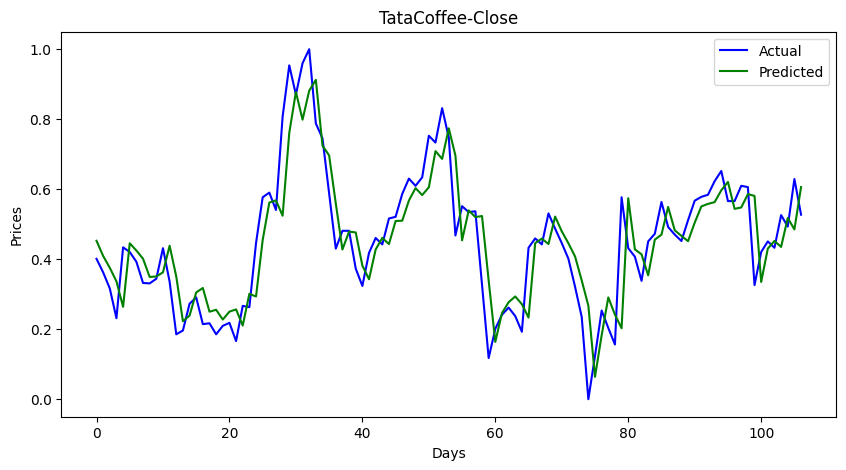

In [18]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [19]:
len(data1)

107

In [21]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [23]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

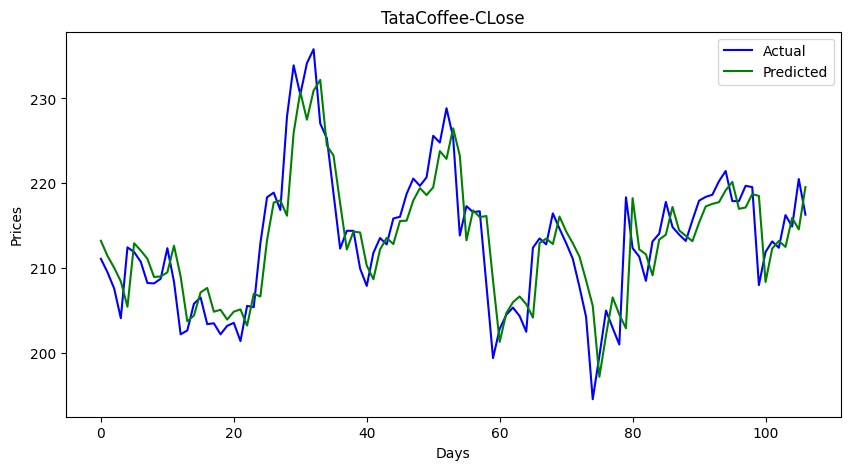

In [24]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [25]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 4.1918036353993955
maPe-Testset: 0.014656109412749108


In [26]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [27]:
forecast

array([0.5106515 , 0.50077358, 0.49258102, 0.48578625])

In [28]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [19]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [29]:
forecast_stock_price_test_oriF

,Closefore
0,215.614377
1,215.206913
2,214.86897
3,214.588686
